<a href="https://colab.research.google.com/github/chezyio/SC1015_Project/blob/main/SC1015_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

README.MD



TDL

1) Work on script/structure for video

2) Start recording video components

3) Edit 

4) Writeup for README.MD

5*) Frontend web app if got time? HAHA

<h1>Detecting Pneumonia using X-Rays</h1>
<div>
  <p>SC1015 Introduction to Data Science and Artificical Intelligence</p>
  <p>B137, Team 10</p>
  <table>
    <tr>
      <th>Name</th>
      <th>Email</th>
    </tr>
    <tr>
      <td>Terri Tan</td>
      <td>TTAN083@e.ntu.edu.sg</td>
    </tr>
    <tr>
      <td>Yanping Kung</td>
      <td>YKUNG001@e.ntu.edu.sg</td>
    </tr>
    <tr>
      <td>Chester Yee</td>
      <td>CYEE006@e.ntu.edu.sg</td>
    </tr>
  </table>
</div>

<h1>Preamble</h1>

 
<p>Pneumonia is an infection that inflames the air sacs in both lungs. It is one of the leading causes of death in Singapore and worldwide. Accounting for 20.7%, 18.8% and 18.4% of deaths in Singapore in 2019,2020 and 2021 according to the death statistics retrieve from HealthHub. As for worldwide, statistics has shown that 2.5 million people have died from pneumonia in 2019.</p> 
<br>
<p>Pneumonia can be caused by viral, bacterial and fungi. Common pneumonias are contagious and can be spread from person to person or through the contact with surfaces or objects that are contaminated by the bacteria or viruses. One example of a viral infections that can cause pneumonia which is common now is the coronavirus infection </p>
<br>
<p> However upon proper detection and treatment, many cases of pneumonia can be cleared without complications. One of the effective ways to identify signs of an inflammation will be Chest X-ray. Through x-rays, doctors will also be able to know the location and extent of this inflammation. </p>
<br>
<p> For the treatment of mild Pneumonia, it can be easily done through antibiotic, antiviral or antifungal medications.  In the case of any underlining health issues, one might be hospitalized and receive treatments such as respiratory and oxygen therapy and will be required to be injected with antibiotics.  </p>

<br>
<p> With statistics in Singapore showing that roughly 11,000 patients is admitted to hospitals with pneumonia and comparing it with the number of death caused by pneumonia in 2021. We can see that about 6000 patients recovers from pneumonia per year </p> 


<h1>Problem Statement</h1>
How might we detect pneumonia for doctors in order to increase the efficiency and accuracy of diagnosis?



<h1>Initialization</h1>

In [1]:
%%capture
!pip install seaborn
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install keras
!pip install -q kaggle

<h1>Import Libraries</h1>

In [21]:
# General
import pandas as pd
import numpy as np
from numpy import asarray

# Directory 
import os
from google.colab import files

# Visualisation
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from PIL import Image

# Deep Learning
import keras
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling, Dropout, GlobalAveragePooling2D, BatchNormalization, RandomFlip, RandomRotation, Resizing
from keras.models import Sequential, load_model, Model
from keras.applications.densenet import DenseNet121
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.losses import CategoricalCrossentropy

In [3]:
# Kaggle API Key 
os.environ['KAGGLE_USERNAME'] = "territellis"
os.environ['KAGGLE_KEY'] = "c9fcf5c0a806a25124e165d1530b3d75"

In [4]:
!kaggle datasets download paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:16<00:00, 33.7MB/s]
100% 2.29G/2.29G [01:16<00:00, 32.2MB/s]


In [5]:
%%capture
!unzip chest-xray-pneumonia.zip -d chest_xray

<h1>Exploratory Data Analysis</h1>
<ul>
  <li>Explore the number of images in train, test and validation folders</li>
  <li>Explore the pixel density distribution of a normal person and a person who has pneumonia</li>
  <li>Applying gaussian blur and canny edge detection to check for any distinct contrast of a normal person and a person who has pneumonia
<ul>


`Any other we can add or explore? hmmm`


In [6]:
train = './chest_xray/chest_xray/train/'
test = './chest_xray/chest_xray/test/'
val = './chest_xray/chest_xray/val/'

trainN = train + 'NORMAL/'
trainP = train + 'PNEUMONIA/'

testN = test + 'NORMAL/'
testP = test + 'PNEUMONIA/'

valN = val + 'NORMAL/'
valP = val + 'PNEUMONIA/'

In [ ]:


# train_ds = tf.keras.utils.image_dataset_from_directory(
#   train,
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

# test_ds = tf.keras.utils.image_dataset_from_directory(
#   test,
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

# val_ds = tf.keras.utils.image_dataset_from_directory(
#   val,
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)


# class_names = train_ds.class_names
# num_classes = len(class_names)
# print(class_names)


# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

# # The image_batch is a tensor of the shape (32, 64, 64, 3). This is a batch of 32 images of shape 64x64x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.
# for image_batch, labels_batch in train_ds:
#   print(image_batch.shape)
#   print(labels_batch.shape)
#   break

Normal: The mean value of the pixels is 116.6375 and the standard deviation is 63.4471
Pneumonia: The mean value of the pixels is 89.9755 and the standard deviation is 40.9543


Text(0.5, 1.0, 'Pneumonia')

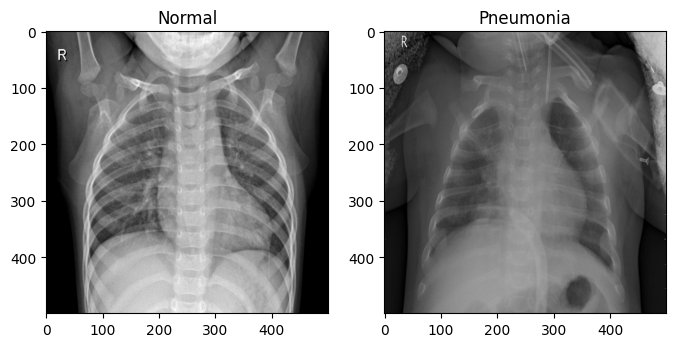

In [7]:
def randomImage(trainSet):
  rand_norm = np.random.randint(0,len(os.listdir(trainSet)))
  pic = os.listdir(trainSet)[rand_norm]
  pic_add = trainSet+pic
  
  # Load images
  load_image = Image.open(pic_add)

  return load_image

def randomImage_address(trainSet):
  rand_norm = np.random.randint(0,len(os.listdir(trainSet)))
  pic = os.listdir(trainSet)[rand_norm]
  pic_add = trainSet+pic
  return pic_add

fig, axarr = plt.subplots(1, 2, figsize=(8,5))
# Plot Normal Xray
img1 = cv2.imread(randomImage_address(trainN))
img1 = cv2.resize(img1, (500, 500))
print(f"Normal: The mean value of the pixels is {img1.mean():.4f} and the standard deviation is {img1.std():.4f}")
axarr[0].imshow(img1, cmap='gray')
axarr[0].set_title('Normal')


# Plot Pneumonia Xray
img2 = cv2.imread(randomImage_address(trainP))
img2 = cv2.resize(img2, (500, 500))
print(f"Pneumonia: The mean value of the pixels is {img2.mean():.4f} and the standard deviation is {img2.std():.4f}")
axarr[1].imshow(img2, cmap='gray')
axarr[1].set_title('Pneumonia')


In [8]:
def distPlot(trainNSet, trainPSet):
  fig, axes = plt.subplots(1, 2, figsize=(12,4))
  # For the normal:
  load_imageN = randomImage(trainNSet)
  load_arrayN = asarray(load_imageN)
  sns.distplot(load_arrayN.ravel(),
              label=f"Pixel Mean {np.mean(load_imageN):.3f} & Standard Deviation {np.std(load_imageN):.3f}", 
              kde=False, ax=axes[0])
  axes[0].legend(loc='upper right')
  axes[0].set(xlabel='Pixel Intensity', ylabel='# Pixels in Image', title='Normal')

  # For Pneumonia:
  load_imageP = randomImage(trainPSet)
  load_arrayP = asarray(load_imageP)
  sns.distplot(load_arrayP.ravel(),
              label=f"Pixel Mean {np.mean(load_imageP):.3f} & Standard Deviation {np.std(load_imageP):.3f}", 
              kde=False, ax=axes[1], color="orange")
  axes[1].legend(loc='upper right')
  axes[1].set(xlabel='Pixel Intensity', ylabel='# Pixels in Image', title='Pneumonia')
  
  # plt.title('Distribution of Pixel Intensities in the Image')
  # plt.xlabel('Pixel Intensity')
  # plt.ylabel('# Pixels in Image')


<ipython-input-8-e80a6e6c353c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(load_arrayN.ravel(),
<ipython-input-8-e80a6e6c353c>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(load_arrayP.ravel(),


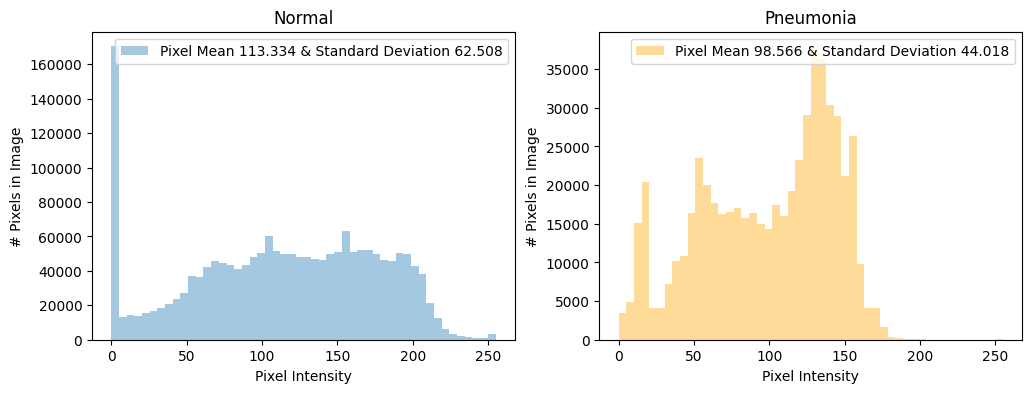

In [9]:
distPlot(trainN, trainP)

There are 5216 images in the training dataset
There are 2682 images in the balance dataset
There are 624 images in the test dataset
There are 16 images in the validation dataset


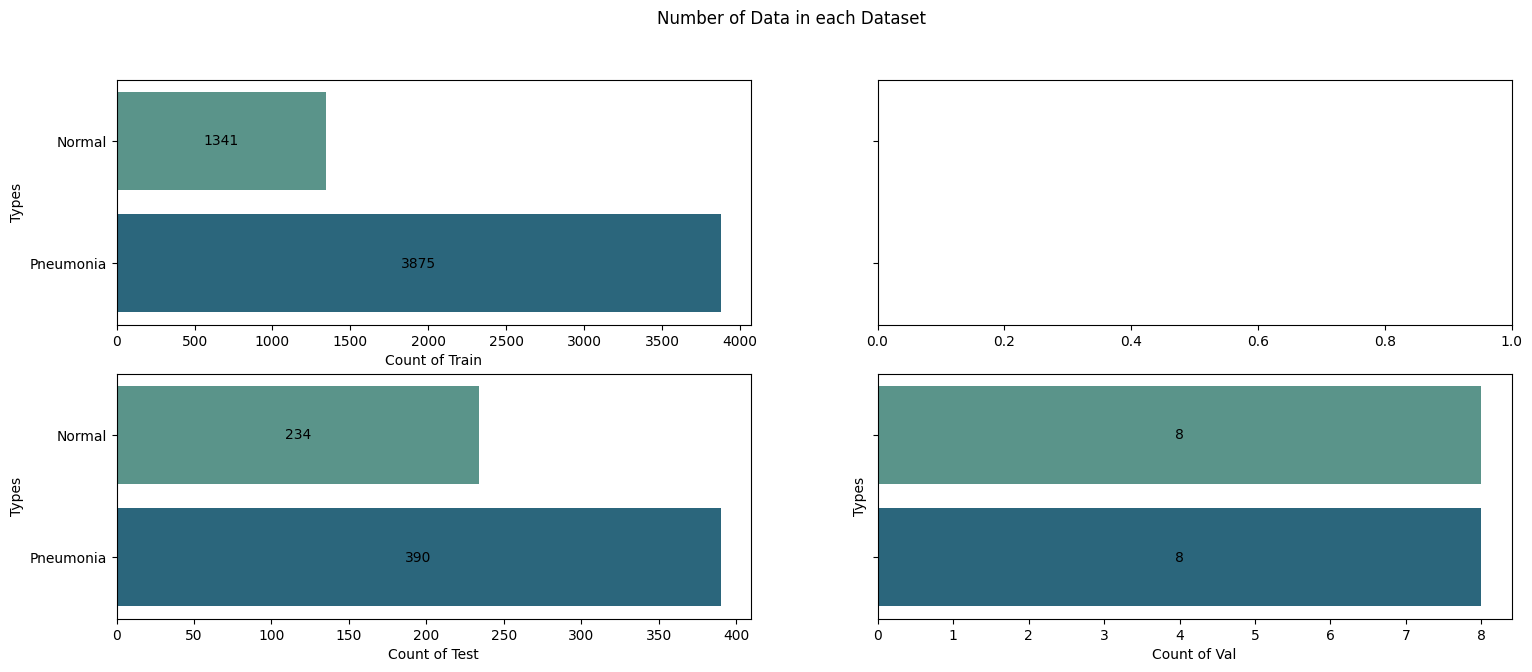

In [10]:
# Create the Balance Data (Taken from train)
p_balanceList = []
n_balanceList = []
all_balanceList = []
for i in range(1341):
  img = randomImage_address(trainP)
  p_balanceList.append(img)
  all_balanceList.append(img)

  pic = os.listdir(trainN)[i]
  pic_add = trainN+pic
  n_balanceList.append(pic_add)
  all_balanceList.append(img)


print("There are {} images in the training dataset".format(len(os.listdir(trainN) + os.listdir(trainP))))
print("There are {} images in the balance dataset".format(len(os.listdir(trainN) + p_balanceList)))
print("There are {} images in the test dataset".format(len(os.listdir(testN) + os.listdir(testP))))
print("There are {} images in the validation dataset".format(len(os.listdir(valN) + os.listdir(valP))))

# For Train
n_count = len(os.listdir(trainN))
p_count = len(os.listdir(trainP))
trainDF = pd.DataFrame({'Types': ['Normal', 'Pneumonia'], 'Count of Train':[n_count, p_count]})

# # For Balance
# n_countBal = len(os.listdir(trainN))
# p_countBal = len(p_balanceList)
# balanceDF = pd.DataFrame({'Types':['Normal', 'Pneumonia'], 'Count of Balance':[n_countBal, p_countBal]})

# For Test
n_countTest = len(os.listdir(testN))
p_countTest = len(os.listdir(testP))
testDF = pd.DataFrame({'Types': ['Normal', 'Pneumonia'], 'Count of Test':[n_countTest, p_countTest]})

# For Val
n_countVal = len(os.listdir(valN))
p_countVal = len(os.listdir(valP))
valDF = pd.DataFrame({'Types': ['Normal', 'Pneumonia'], 'Count of Val':[n_countVal, p_countVal]})

fig, axes = plt.subplots(2,2, figsize=(18,7), sharey=True)
fig.suptitle('Number of Data in each Dataset')

ax1 = sns.barplot(ax=axes[0,0], x=trainDF['Count of Train'], y=trainDF['Types'], orient='h', palette='crest')
# ax2 = sns.barplot(ax=axes[0,1], x=balanceDF['Count of Balance'], y=balanceDF['Types'], orient='h', palette='crest')
ax3 = sns.barplot(ax=axes[1,0], x=testDF['Count of Test'], y=testDF['Types'], orient='h', palette='crest')
ax4 = sns.barplot(ax=axes[1,1], x=valDF['Count of Val'], y=valDF['Types'], orient='h', palette='crest')


for i in ax1.containers:
  ax1.bar_label(i,label_type='center')

# for i in ax2.containers:
#   ax2.bar_label(i,label_type='center')

for i in ax3.containers:
  ax3.bar_label(i,label_type='center')

for i in ax4.containers:
  ax4.bar_label(i,label_type='center')

plt.show()

In [11]:
# weighted loss function to tackle class imbalance issue
weight_for_0 = p_count / (n_count + p_count)
weight_for_1 = n_count / (n_count + p_count)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")


Weight for class 0: 0.74
Weight for class 1: 0.26


In [ ]:
# pVal = [p for p in os.listdir(val + 'PNEUMONIA')]
# nVal = [p for p in os.listdir(val + 'NORMAL')]

# plt1=plt.figure(figsize=(5,5))
# for i in range(len(pVal)):
#   img = cv2.imread(val + 'PNEUMONIA/' + pVal[i])
#   img = cv2.resize(img, (500, 500))
#   img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#   img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0, 0), 512/10), -4, 128)
#   plt1.add_subplot(3, 3, i+1)
#   plt.imshow(img)
#   plt.axis("off")
# plt.suptitle('PNEUMONIA')

# plt2=plt.figure(figsize=(5,5))
# for i in range(len(nVal)):
#   img1 = cv2.imread(val + 'NORMAL/' + nVal[i])
#   img1 = cv2.resize(img, (500, 500))
#   img1 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#   img1 = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0, 0), 512/10), -4, 128)
#   plt2.add_subplot(3, 3, i+1)
#   plt.imshow(img1)
#   plt.axis("off")
# plt.suptitle('NORMAL')

In [ ]:
# pVal = [p for p in os.listdir(val + 'PNEUMONIA')]
# nVal = [p for p in os.listdir(val + 'NORMAL')]

# plt1=plt.figure(figsize=(5,5))
# for i in range(len(pVal)):
#   img = cv2.imread(val + 'PNEUMONIA/' + pVal[i])
#   img = cv2.resize(img, (500, 500))
#   img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#   plt1.add_subplot(3, 3, i+1)
#   pdetected_edges = cv2.Canny(img, 80, 100)
#   plt.imshow(pdetected_edges)
#   plt.axis("off")
# plt.suptitle('PNEUMONIA')

# plt2=plt.figure(figsize=(5,5))
# for i in range(len(nVal)):
#   img1 = cv2.imread(val + 'NORMAL/' + nVal[i])
#   img1 = cv2.resize(img, (500, 500))
#   img1 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#   plt2.add_subplot(3, 3, i+1)
#   ndetected_edges2 = cv2.Canny(img, 80, 100)
#   plt.imshow(ndetected_edges2)
#   plt.axis("off")
# plt.suptitle('NORMAL')

<h1>Image Processing</h1>

<ul>
  <li>Rescale</li>
  <li>Resize</li>
<ul>

In [12]:
batch_size = 32
img_height = 64
img_width = 64

train_ds = tf.keras.utils.image_dataset_from_directory(
  train,
    labels = "inferred",
    label_mode = "categorical",
    color_mode = "rgb",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
  test,
    labels = "inferred",
    label_mode = "categorical",
    color_mode = "rgb",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  val,
        labels = "inferred",
    label_mode = "categorical",
    color_mode = "rgb",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [ ]:

data_augmentation = Sequential([
  Rescaling(1./255),
  Resizing(64, 64,interpolation='bilinear', crop_to_aspect_ratio=False)
])


<h1>Convolutional Neural Network (CNN)</h1>

<p>CNN is a type of neural network that are specifically designed for processing data that has a grid-like structure, such as images, video, and audio. CNNs are commonly used for image classification, object detection, and segmentation tasks.</p>

<p>CNNs are trained using backpropagation and stochastic gradient descent to minimize a loss function. During training, the weights of the filters and the fully connected layers are updated iteratively to improve the network's performance.</p>

<p>The three main types of layers in a CNN are:</p>


<h4>Convolutional Layers</h4>
<p>Convolutional layers apply a set of learnable filters to the input data to extract features that are important for the task at hand. Each filter slides over the input data and performs element-wise multiplication followed by summation to produce a single value, which is then passed through an activation function. The output of a convolutional layer is a set of feature maps that represent different aspects of the input data.</p>

<br>

<h4>Pooling Layers</h4>
<p>These layers downsample the feature maps by taking the maximum, average, or other function of a local region. This reduces the dimensionality of the feature maps while retaining the important information.</p>

<br>

<h4>Fully Connected Layers</h4>
<p>Fully Connected layers perform a classification task on the features extracted by the previous layers. Each neuron in a fully connected layer is connected to all the neurons in the previous layer.</p>

<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*vkQ0hXDaQv57sALXAJquxA.jpeg'>


<img src='https://miro.medium.com/v2/resize:fit:1052/1*GcI7G-JLAQiEoCON7xFbhg.gif'>

<img src='https://miro.medium.com/v2/resize:fit:1192/format:webp/1*KQIEqhxzICU7thjaQBfPBQ.png'>



<h1>ConvNet — Model Architecture</h1>

In [22]:
model = Sequential([
  data_augmentation,
  Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)),
  BatchNormalization(),
  MaxPooling2D(pool_size = (2, 2)),

  Conv2D(64, (3, 3), activation="relu"),
  BatchNormalization(),
  MaxPooling2D(pool_size = (2, 2)),

  Conv2D(128, (3, 3), activation="relu"),
  BatchNormalization(),
  MaxPooling2D(pool_size = (2, 2)),

  Flatten(),

  Dense(activation = 'relu', units = 128),
  Dense(2, activation='softmax')])

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.build(input_shape=(None, 64, 64, 3))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 64, 64, 3)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_15 (Bat  (None, 62, 62, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_16 (Bat  (None, 29, 29, 64)     

<h1>ConvNet — Train Model</h1>
<ul>
  <li>Using imbalanced pure dataset</li>
  <li>Using balanced dataset with the help of weighted loss function</li>

In [24]:
h1_imbalanced = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
163/163 [==============================] - 82s 487ms/step - loss: 0.0535 - accuracy: 0.9814 - val_loss: 4.6495 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 80s 484ms/step - loss: 0.0429 - accuracy: 0.9839 - val_loss: 1.2480 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 81s 488ms/step - loss: 0.0154 - accuracy: 0.9942 - val_loss: 1.2196 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 82s 487ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.1303 - val_accuracy: 0.9375
Epoch 5/10
163/163 [==============================] - 81s 487ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.5239 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 81s 490ms/step - loss: 7.7131e-04 - accuracy: 1.0000 - val_loss: 0.1056 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 81s 488ms/step - loss: 1.5907e-04 - accuracy: 1.0000 - val_loss: 0.0290 

In [23]:
h1_balanced = model.fit(
  train_ds,
  validation_data=val_ds,
  class_weight=class_weight,
  epochs=10
)

Epoch 1/10
163/163 [==============================] - 82s 485ms/step - loss: 0.0839 - accuracy: 0.9323 - val_loss: 9.6430 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 80s 484ms/step - loss: 0.0304 - accuracy: 0.9686 - val_loss: 17.6412 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 88s 532ms/step - loss: 0.0268 - accuracy: 0.9734 - val_loss: 9.6719 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 87s 516ms/step - loss: 0.0182 - accuracy: 0.9804 - val_loss: 0.4453 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 87s 524ms/step - loss: 0.0175 - accuracy: 0.9827 - val_loss: 0.5857 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 82s 483ms/step - loss: 0.0152 - accuracy: 0.9847 - val_loss: 0.6903 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 80s 485ms/step - loss: 0.0122 - accuracy: 0.9873 - val_loss: 0.6529 - val_a

<h1>ConvNet — Evaluate Model</h1>
<p>Based on the perfomance of model, we can deduce that the CNN model is rather accurate as the validation accuracy is closely follows the training accuracy. When comparing the training and validation loss, it also shows that the validation loss closely follows the training loss overtime. In order to maximise the training and validation accuracy, we have performed tuned several hyperparameter tuning and this was the result. When tuning the hyperparameters, we were also mindful of the fact that over tuning the model could result in overfitting and under tuning the model could result in underfitting.</p> 

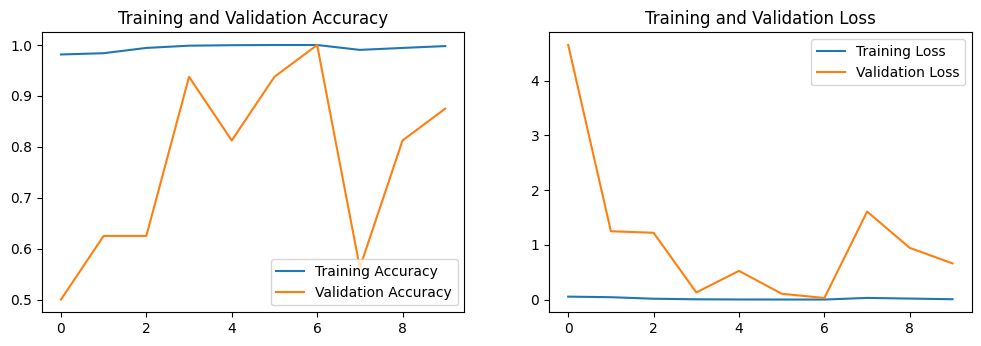

Average accuracy: 0.9940375745296478
Average validation accuracy: 0.76875
Average loss: 0.017315407571732066
Average validation loss: 1.1116742394864558


In [27]:
# imbalanced

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(h1_imbalanced.history['accuracy'], label='Training Accuracy')
plt.plot(h1_imbalanced.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(h1_imbalanced.history['loss'], label='Training Loss')
plt.plot(h1_imbalanced.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print('Average accuracy:', np.average(h1_imbalanced.history['accuracy']))
print('Average validation accuracy:', np.average(h1_imbalanced.history['val_accuracy']))

print('Average loss:', np.average(h1_imbalanced.history['loss']))
print('Average validation loss:', np.average(h1_imbalanced.history['val_loss']))

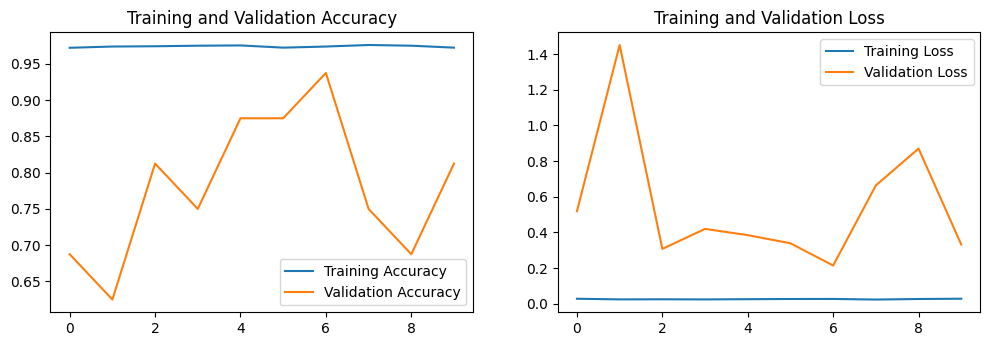

Average accuracy: 0.9740797460079194
Average validation accuracy: 0.78125
Average loss: 0.026002442836761473
Average validation loss: 0.5502416342496872


In [ ]:
# balanced

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(h1_balanced.history['accuracy'], label='Training Accuracy')
plt.plot(h1_balanced.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(h1_balanced.history['loss'], label='Training Loss')
plt.plot(h1_balanced.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print('Average accuracy:', np.average(h1_balanced.history['accuracy']))
print('Average validation accuracy:', np.average(h1_balanced.history['val_accuracy']))

print('Average loss:', np.average(h1_balanced.history['loss']))
print('Average validation loss:', np.average(h1_balanced.history['val_loss']))

<h1>ConvNet — Validate Model</h1>

In [28]:
evaluation = model.evaluate(test_ds)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_ds)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 5s 177ms/step - loss: 2.1551 - accuracy: 0.7340
Test Accuracy: 73.40%
163/163 [==============================] - 43s 254ms/step - loss: 0.0112 - accuracy: 0.9969
Train Accuracy: 99.69%


In [29]:
pred = model.predict(test_ds)

print(confusion_matrix(test_ds.class_names, pred > 0.5))
pd.DataFrame(classification_report(test_ds.class_names, pred > 0.5, output_dict=True))

20/20 [==============================] - 11s 292ms/step


ValueError: ignored

<h1>ConvNet — Test Model</h1>

In [ ]:
# # Val Normal Dataset
# nVal = [x for x in os.listdir(val + 'NORMAL')]
# count = 1

# label = []
# for image in nVal:
#   imgFilePath = val + 'NORMAL/' + image
#   print("\nIMAGE " + str(count) + ": " + image)
#   img = tf.keras.utils.load_img(
#     imgFilePath, target_size=(img_height, img_width)
#   )
#   img_array = tf.keras.utils.img_to_array(img)
#   img_array = tf.expand_dims(img_array, 0) # Create a batch

#   predictions = model.predict(img_array)
#   score = tf.nn.softmax(predictions[0])

#   lbl2 = []
#   lbl2.append(class_names[np.argmax(score)])
#   lbl2.append(100 * np.max(score))
#   label.append(lbl2)
#   #print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))
#   count+=1

# plt.figure(figsize=(10,10))
# for i in range(len(nVal)):
#   # loadImg = Image.open(val + 'NORMAL/' + nVal[i])
#   ax = plt.subplot(3, 3, i+1)
#   # plt.imshow(loadImg, cmap='gray')
#   img = cv2.imread(val + 'NORMAL/' + nVal[i])
#   img = cv2.resize(img, (512, 512))
#   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#   kernel = np.ones((5, 5), np.uint8)
#   image_dilation = cv2.dilate(img, kernel, iterations = 2)
#   plt.imshow(image_dilation)
#   plt.title("{} \nconfidence: {:.2f}" .format(label[i][0], label[i][1]))
#   plt.axis("off")
    

In [ ]:
# # Val Pneumonia Dataset
# pVal = [p for p in os.listdir(val + 'PNEUMONIA')]
# count = 1
# label = []
# for imagePath in pVal:
#   test_path = val + 'PNEUMONIA/' + imagePath
#   print("\nIMAGE " + str(count) + ": " + imagePath)
#   img = tf.keras.utils.load_img(
#     test_path, target_size=(img_height, img_width)
#   )
#   img_array = tf.keras.utils.img_to_array(img)
#   img_array = tf.expand_dims(img_array, 0) # Create a batch

#   predictions = model.predict(img_array)
#   score = tf.nn.softmax(predictions[0])

#   lbl2 = []
#   lbl2.append(class_names[np.argmax(score)])
#   lbl2.append(100 * np.max(score))
#   label.append(lbl2)
#   #print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))
#   count+=1

# plt.figure(figsize=(10,10))
# for i in range(len(pVal)):
#   # loadImg = Image.open(val + 'PNEUMONIA/' + pVal[i])
#   # ax = plt.subplot(3, 3, i+1)
#   # plt.imshow(loadImg, cmap='gray')
#   # plt.title("{} \nconfidence: {:.2f}" .format(label[i][0], label[i][1]))
#   # plt.axis("off")
#   ax = plt.subplot(3, 3, i+1)
#   img = cv2.imread(val + 'PNEUMONIA/' + pVal[i])
#   img = cv2.resize(img, (512, 512))
#   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#   kernel = np.ones((5, 5), np.uint8)
#   image_dilation = cv2.dilate(img, kernel, iterations = 2)
#   plt.imshow(image_dilation)
#   plt.title("{} \nconfidence: {:.2f}" .format(label[i][0], label[i][1]))
#   plt.axis("off")

<h1>Densely Connected Convolutional Network (DenseNet)</h1>

<img src='https://pytorch.org/assets/images/densenet1.png' />

<p>
DenseNet is a type of CNN that emphasizes feature reuse and encourages the flow of information across different layers of the network. DenseNet also require fewer parameters as compared to CNN as there is no need to learn redundant feature maps.

The basic idea behind DenseNet is to connect all layers in a feed-forward fashion. Unlike traditional CNNs, which stack convolutional layers on top of each other, DenseNet connects each layer to every other layer in a feed-forward fashion. In this way, each layer receives information not only from the preceding layer but also from all the preceding layers in the network.

DenseNet also incorporates a technique called "feature concatenation", which involves concatenating the feature maps produced by each layer before passing them on to the next layer. This encourages the network to reuse features from earlier layers, which can help to reduce the number of parameters required and improve performance.


</p>


<p>We have chosen DenseNet121 for a basic comparison between the state-of-the-art CNN architecture and the primitive implementation of a basic CNN.</p>

</table>

<h1>DensetNet — Model Architecture</h1>

In [ ]:
lrs = tf.keras.callbacks.ReduceLROnPlateau()
int_lr = 0.0001
epoch = 10
batch_size = 32

# Early Stopping helps to stop the training process when the model stops improving. This is to reduce the amount of time needed to train over nuance changes in the model. 
early_stoppage = EarlyStopping(monitor='val_loss', patience=10)

# DenseNet Model
densed_model = DenseNet121(include_top=False,input_tensor= tf.keras.Input(shape=(64,64,3)), weights='imagenet')

# Freeze the layers
for layer in densed_model.layers[:101]:    
    layer.trainable = False

for layer in densed_model.layers[101:]:  
    layer.trainable = True

model = tf.keras.Sequential()
model.add(densed_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))


model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()


29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 flatten_5 (Flatten)         (None, 4096)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               524416    
                                                                 
 dense_11 (Dense)            (None, 2)                 258       
                                                                 
Total params: 7,562,178
Trainable params: 6,636,994
Non-trainable params: 925,184
_________________________________________________________________


<h1>DensetNet — Train Model</h1>

In [ ]:
h2 = model.fit(train_ds, epochs=epoch, validation_data=val_ds, callbacks=[early_stoppage,lrs])

model.save('./model/denseNet121/denseNetModel.h5')
model.save_weights('./model/denseNet121/denseNetWeights.h5')

Epoch 1/10
163/163 [==============================] - 269s 1s/step - loss: 0.1557 - accuracy: 0.9419 - val_loss: 3.5381 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 2/10
163/163 [==============================] - 233s 1s/step - loss: 0.0646 - accuracy: 0.9749 - val_loss: 0.2415 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 3/10
163/163 [==============================] - 253s 2s/step - loss: 0.0523 - accuracy: 0.9837 - val_loss: 0.1140 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 4/10
163/163 [==============================] - 233s 1s/step - loss: 0.0430 - accuracy: 0.9854 - val_loss: 0.2644 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 5/10
163/163 [==============================] - 230s 1s/step - loss: 0.0289 - accuracy: 0.9889 - val_loss: 0.0945 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 6/10
163/163 [==============================] - 230s 1s/step - loss: 0.0293 - accuracy: 0.9875 - val_loss: 1.4247 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 7/10
163/163 [==============================] - 231s 1s/st

<h1>DensetNet — Evaluate Model</h1>

Average accuracy: 0.9835122704505921
Average val_accuracy: 0.85
Average loss: 0.045191016234457496
Average val_loss: 0.6576107785105705


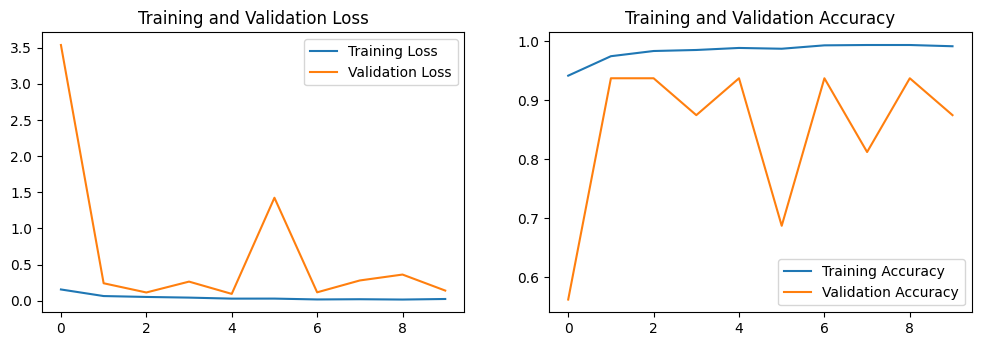

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(h2.history['loss'], label='Training Loss')
plt.plot(h2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(2, 2, 2)
plt.plot(h2.history['accuracy'], label='Training Accuracy')
plt.plot(h2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

print('Average accuracy:', np.average(h2.history['accuracy']))
print('Average val_accuracy:', np.average(h2.history['val_accuracy']))

print('Average loss:', np.average(h2.history['loss']))
print('Average val_loss:', np.average(h2.history['val_loss']))

<h1>Conclusion</h1>

<table>
  <tr>
    <th></th>
    <th colspan='2' style='background-color: blue'>ConvNet</th>
    <th style='background-color: pink'>DenseNet</th>
  </tr>
  <tr>
    <th></th>
    <th>CNN (Imbalance)</th>
    <th>CNN (Balanced)</th>
    <th>DenseNet121 (Balanced)</th>
    
  </tr>

  <tr>
    <td>Training Accuracy</td>
    <td>99.4</td>
    <td>97.4</td>
    <td>98.4</td>
  </tr>
  <tr>
    <td>Validation Accuracy</td>
    <td>76.9</td>
    <td>78.1</td>
    <td>85.0</td>
  </tr>
  <tr>
    <td>Test Accuracy</td>
    <td>86.25</td>
    <td>z</td>
    <td>z</td>
  </tr>
  <tr>
    <td>Loss</td>
    <td>0.0173</td>
    <td>0.0260</td>
    <td>0.0452</td>
  </tr>
  <tr>
    <td>Validation Loss</td>
    <td>1.11</td>
    <td>0.550</td>
    <td>0.658</td>
  </tr> 

</table>

<h5>Best performing model: DenseNet121 (Balanced)</h5>



<h1>Acknowledgements</h1>

Dataset https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia